In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
%sx pwd

from pprint import pprint

import matplotlib.pylab as plt
import openpifpaf.logs

# Latest

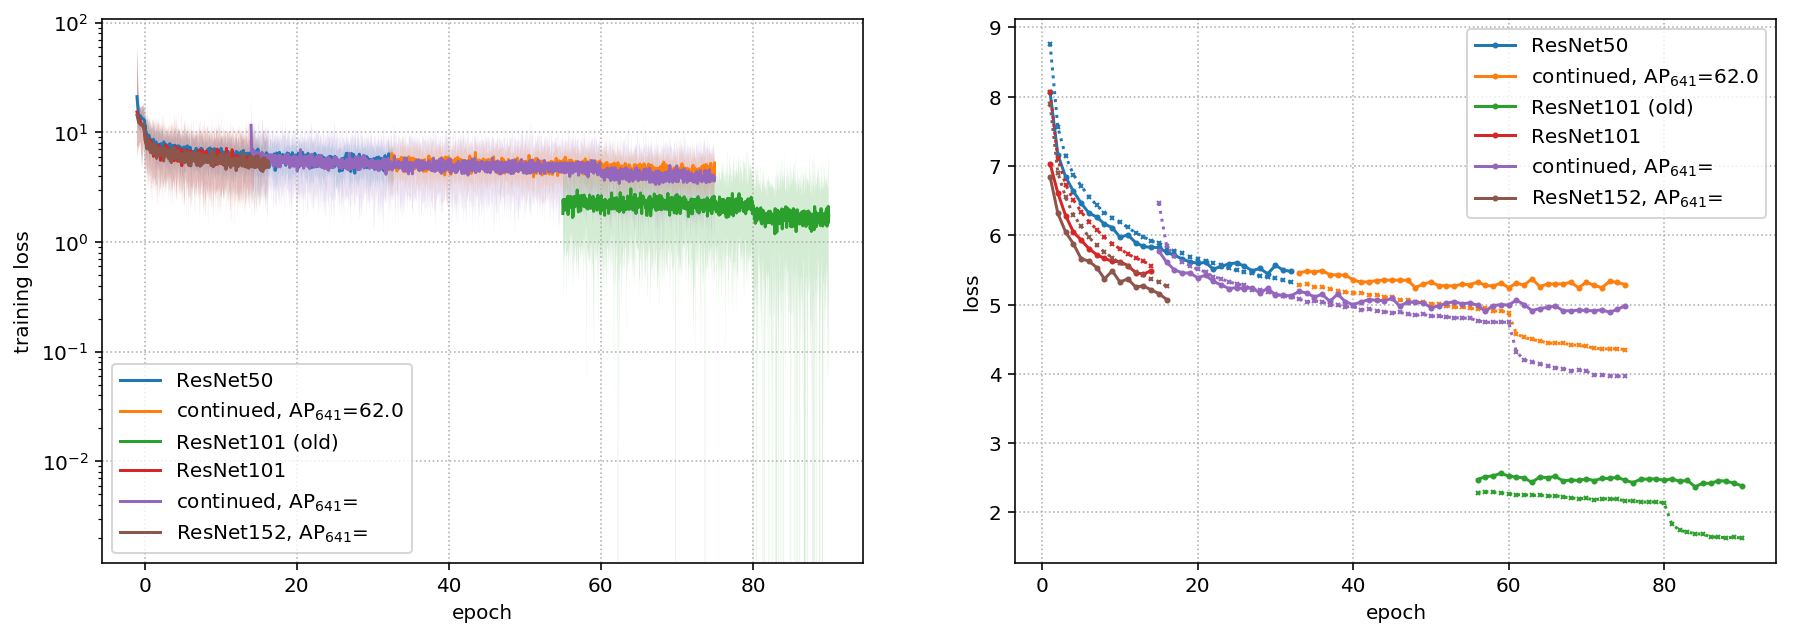

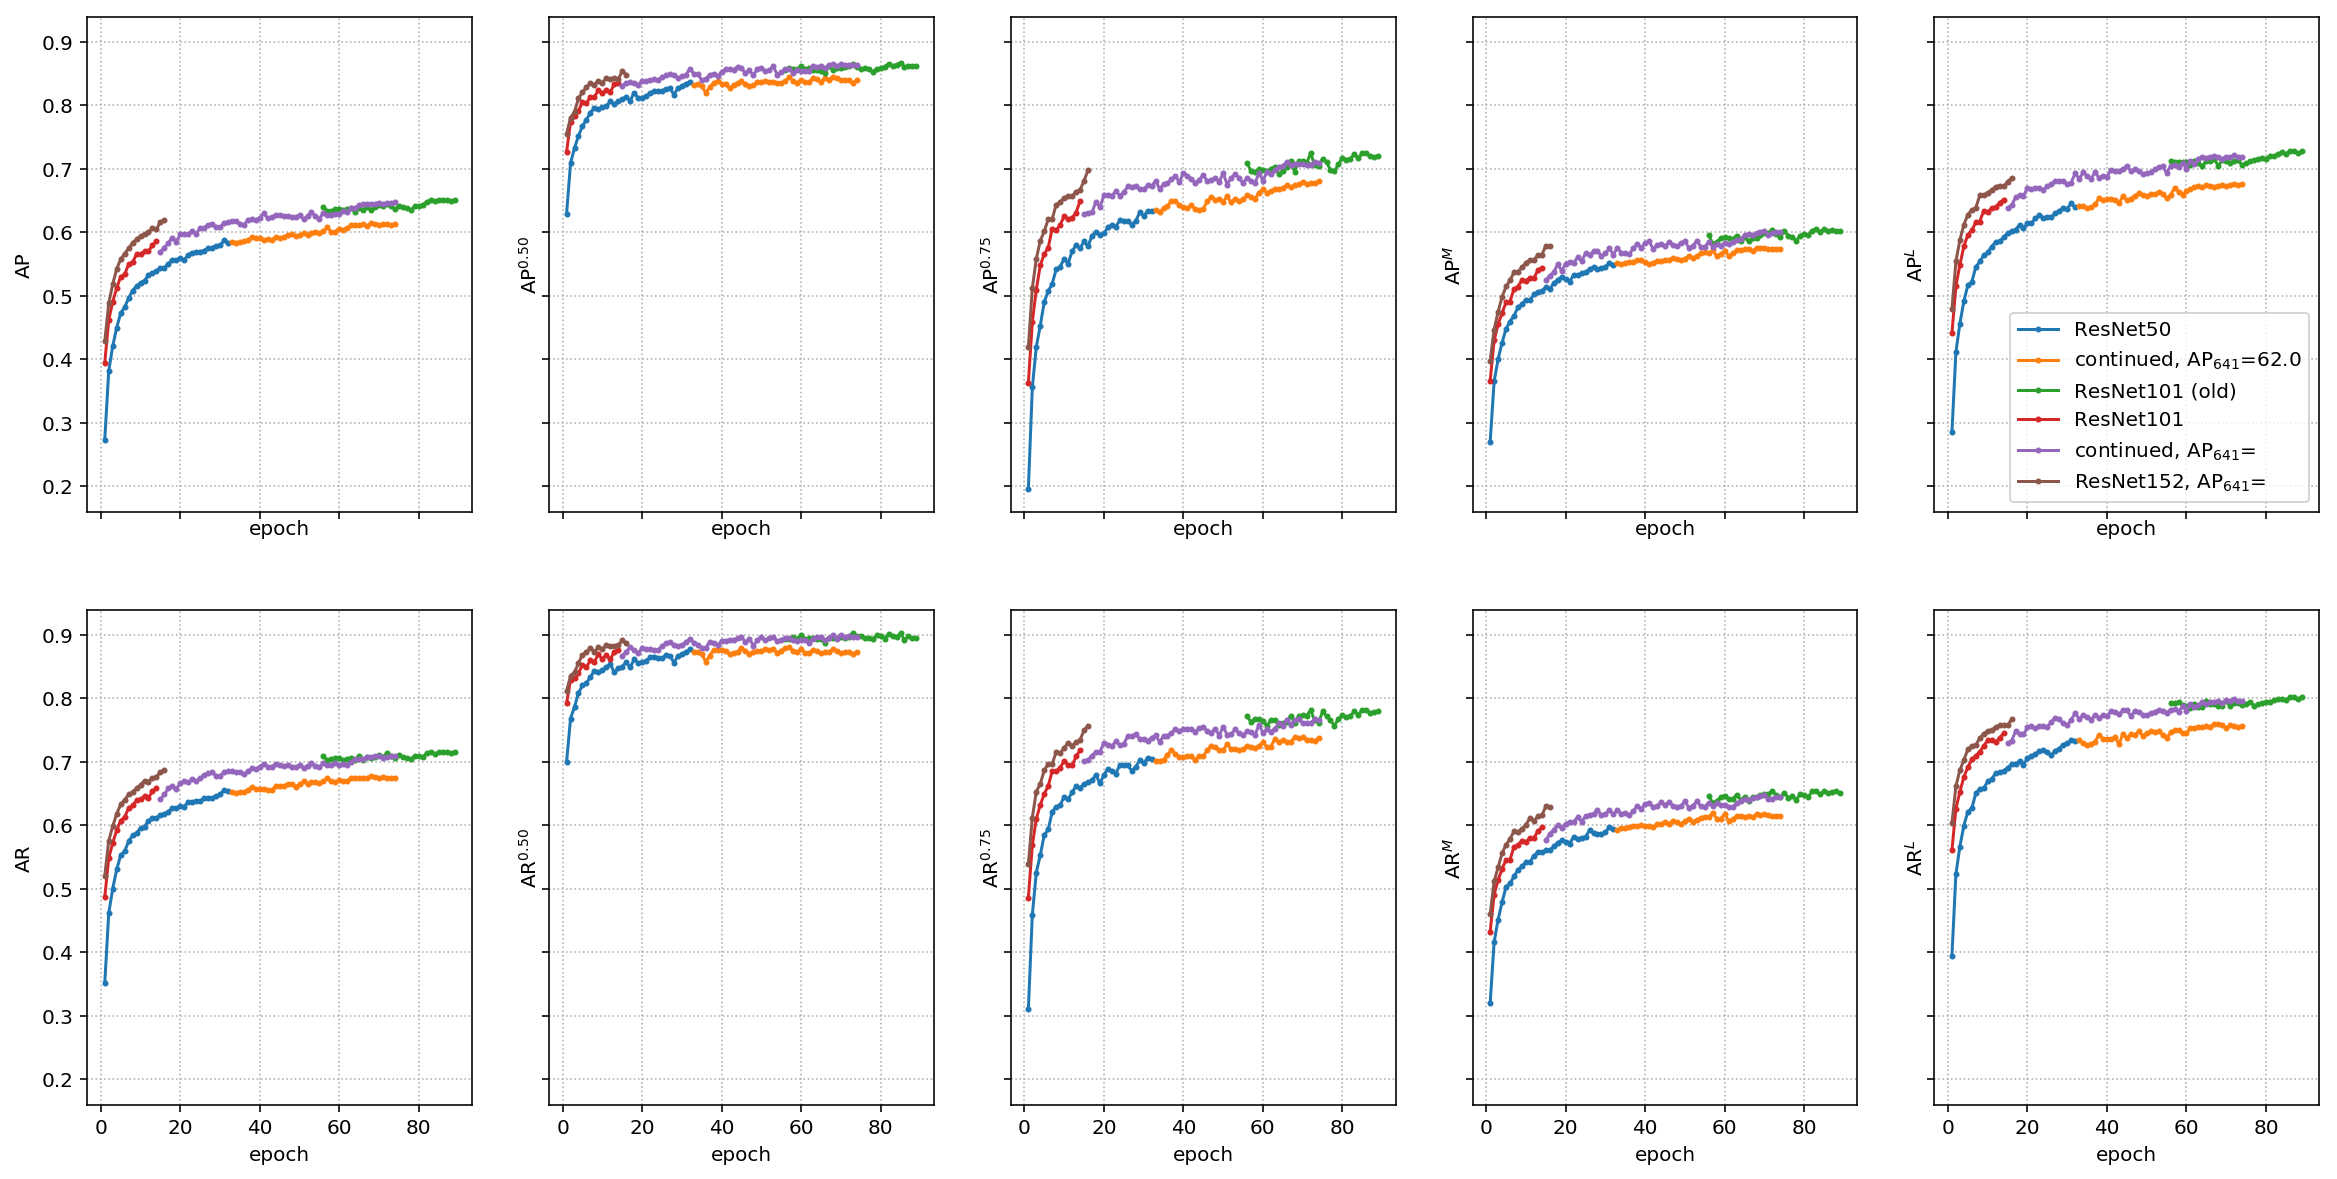

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plots = openpifpaf.logs.Plots([
#     '../outputs/resnet50block5-pif-paf-edge401-laplace-190221-181336.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-laplace-190224-131910.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-190225-112156.pkl.log',
#     '../outputs/resnet101block5-pif-paf-edge401-laplace-190221-213355.pkl.log',
    '../outputs/resnet101block5-pifs-pafs-edge401-l1-190216-165258.pkl.log',
    '../outputs/resnet101block5-pif-paf-edge401-laplace-190221-213355.pkl.log',
    '../outputs/resnet101block5-pif-paf-edge401-laplace-190222-115232.pkl.log',
    '../outputs/resnet152block5-pif-paf-edge401-laplace-190221-212949.pkl.log',
], [
    'ResNet50',
    'continued, AP$_{641}$=62.0',    
    'ResNet101 (old)',
    'ResNet101',
    'continued, AP$_{641}$=',
    'ResNet152, AP$_{641}$=',
])
#pprint(plots.process_arguments())
plots.train(ax1); ax1.set_yscale('log', nonposy='clip')
plots.epoch_loss(ax2)

# Precision and Recall plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True, sharex=True)
eval_plots = openpifpaf.logs.EvalPlots(plots.log_files, plots.labels, edge=641, samples=500)
# precisions
eval_plots.ap(axs[0, 0])
eval_plots.ap050(axs[0, 1])
eval_plots.ap075(axs[0, 2])
eval_plots.apm(axs[0, 3])
eval_plots.apl(axs[0, 4])
# recalls
eval_plots.ar(axs[1, 0])
eval_plots.ar050(axs[1, 1])
eval_plots.ar075(axs[1, 2])
eval_plots.arm(axs[1, 3])
eval_plots.arl(axs[1, 4])
axs[0, 4].legend();

# Ablation Study: Type of Regression Loss

Evaluating at epoch 10.

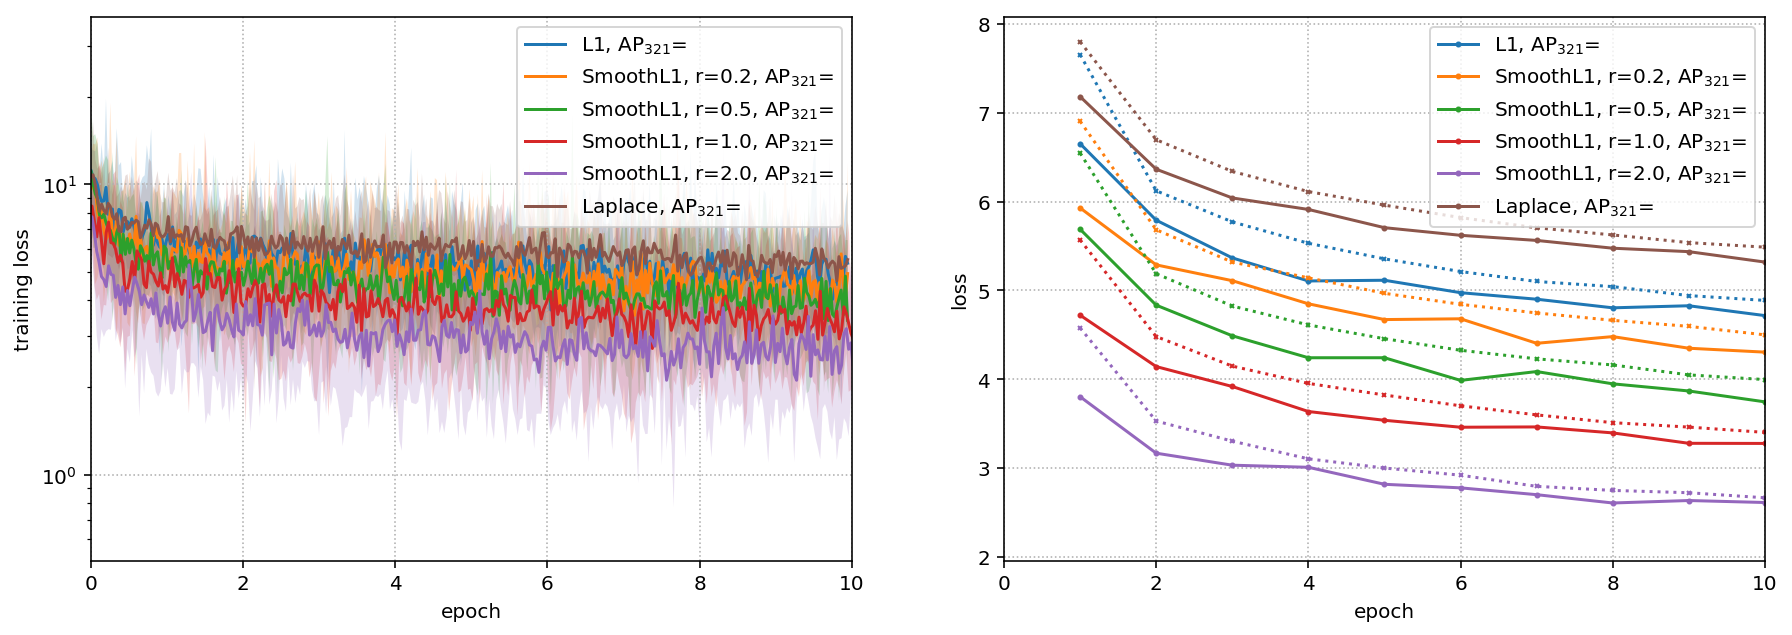

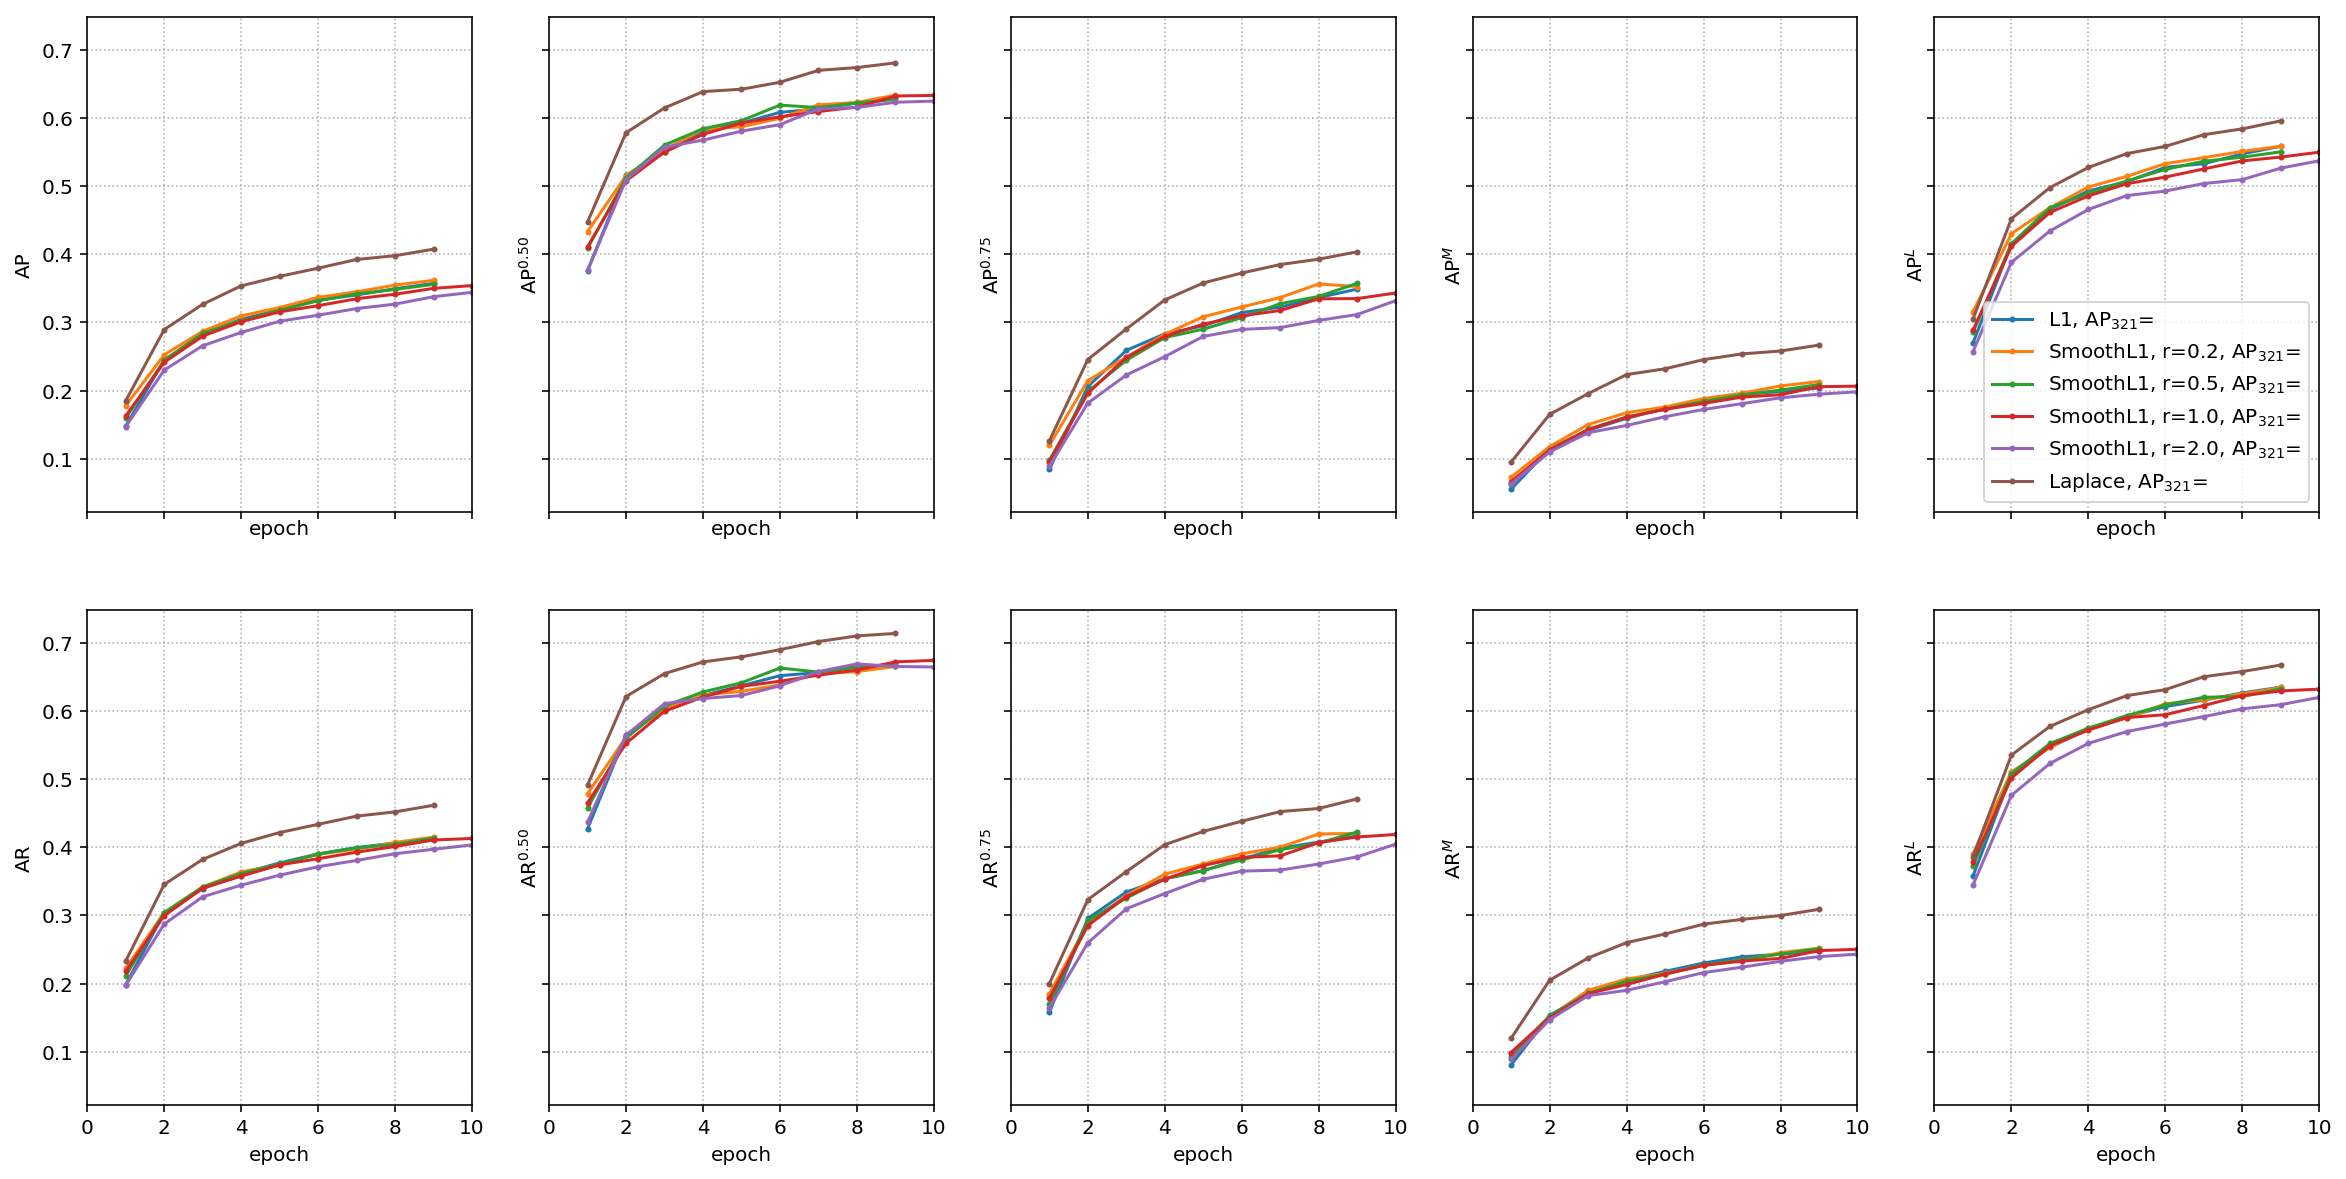

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plots = openpifpaf.logs.Plots([
    '../outputs/resnet50block5-pif-paf-edge401-l1-190226-101830.pkl.log',
#      '../outputs/resnet50block5-pif-paf-edge401-l1-190227-085332.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-smoothl1-rsmooth0.2-190227-180604.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-smoothl1-rsmooth0.5-190227-180443.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-smoothl1-rsmooth1.0-190227-142433.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-smoothl1-rsmooth2.0-190227-144415.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-190226-065802.pkl.log',
#      '../outputs/resnet50block5-pif-paf-edge401-190227-071707.pkl.log',
], [
    'L1, AP$_{321}$=',
    'SmoothL1, r=0.2, AP$_{321}$=',
    'SmoothL1, r=0.5, AP$_{321}$=',
    'SmoothL1, r=1.0, AP$_{321}$=',
    'SmoothL1, r=2.0, AP$_{321}$=',
    'Laplace, AP$_{321}$=',
])
# pprint(plots.process_arguments())
ax1.set_xlim(right=10)
ax2.set_xlim(right=10)
plots.train(ax1); ax1.set_yscale('log', nonposy='clip')
plots.epoch_loss(ax2)

# Precision and Recall plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True, sharex=True)
axs[0][0].set_xlim(right=10)
eval_plots = openpifpaf.logs.EvalPlots(plots.log_files, plots.labels, edge=321, samples=500)
# precisions
eval_plots.ap(axs[0, 0])
eval_plots.ap050(axs[0, 1])
eval_plots.ap075(axs[0, 2])
eval_plots.apm(axs[0, 3])
eval_plots.apl(axs[0, 4])
# recalls
eval_plots.ar(axs[1, 0])
eval_plots.ar050(axs[1, 1])
eval_plots.ar075(axs[1, 2])
eval_plots.arm(axs[1, 3])
eval_plots.arl(axs[1, 4])
axs[0, 4].legend();